## 导入模块

In [2]:
import IPython
import sklearn as sk
from sympy import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split # 交叉验证子模块 cross_validation 未来将弃用
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem # sem 标准误差平均

In [3]:
# 导入 Olivetti 数据集的提取函数 fetch_olivetti_faces
from sklearn.datasets import fetch_olivetti_faces
# 提取数据
faces = fetch_olivetti_faces()

## 展示部分图片

In [4]:
def print_faces(images, target, top_n):
    fig = plt.figure(figsize=(12, 12)) # figsize = (width, height) in inches 12*2.54 = 30.48
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1) # 调整子图
    for i in range(top_n):
        # 输出图片 20 张成一行，可成 20 行
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[]) # 第 i 个子图
        p.imshow(images[i], cmap=plt.cm.bone)  # 显示图片，设置颜色映射
        
        # 标记图片 左上角是目标值，左下角是图片索引值
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))    

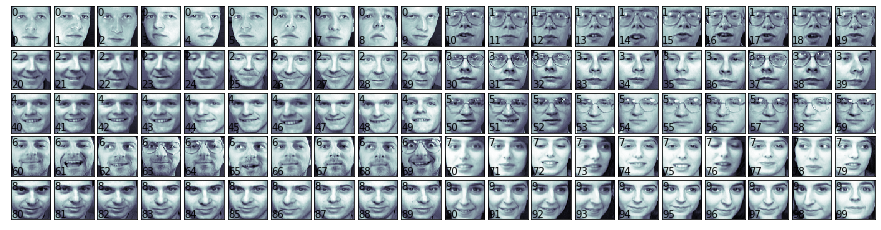

In [5]:
print_faces(faces.images, faces.target, 100)

## 数据准备 —— 有胡子的目标数组

In [9]:
#肉眼观察，人工挑选出有胡子的照片
beard= [(60,69),(100,109),(130,139),(150,169),(240,259),(270,279),(360,369)]
def create_target(segments):
    # 零数组初始化
    y = np.zeros(faces.target.shape[0])
    # 戴眼镜头像置 1
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y
target_beard = create_target(beard)
target_beard

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## 开始训练（采用线性核函数）

In [113]:
# 导入评价子模块
from sklearn import metrics
from sklearn.svm import SVC
X_train, X_test, y_train, y_test,img_train, img_test = train_test_split(faces.data, target_beard, faces.images,test_size=0.25, random_state=0)
#svc_beard = SVC(C=100.0, kernel='rbf',tol=0.0001,)
svc_beard = SVC(C=1.0, kernel='linear',tol=0.001,)

## 采用K-折交叉评价

In [114]:
def evaluate_cross_validation(clf, X, y, K):
    # 创建 K-折交叉验证迭代器对象
    cv = KFold(K, shuffle=True, random_state=0)
    # 计算返回分数
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print (("\n平均值: {0:.3f} (均标准差:+/-{1:.3f})").
           format(
               np.mean(scores), # 均值
               sem(scores) )    # 均标准差
           )
evaluate_cross_validation(svc_beard, X_train, y_train, 5)

[0.96666667 0.95       0.96666667 0.98333333 0.93333333]

平均值: 0.960 (均标准差:+/-0.008)


## 测试分类器函数

In [115]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)             # 训练
    print ("训练集精度:")   # 训练集精度
    print (clf.score(X_train, y_train))
    print ("\n测试集精度:")    # 测试集精度
    print (clf.score(X_test, y_test))
    y_pred = clf.predict(X_test) 
    print ("\n分类识别报告:")      # 分类识别报告
    print (metrics.classification_report(y_test, y_pred))
    print ("\n混淆矩阵:")           # 混淆矩阵
    print (metrics.confusion_matrix(y_test, y_pred))
train_and_evaluate(svc_beard, X_train, X_test, y_train, y_test)

训练集精度:
1.0

测试集精度:
0.97

分类识别报告:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        78
         1.0       0.91      0.95      0.93        22

    accuracy                           0.97       100
   macro avg       0.95      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100


混淆矩阵:
[[76  2]
 [ 1 21]]


## 错误结果展示

[21, 48, 98]


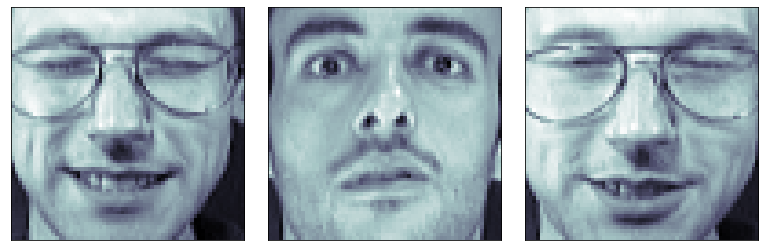

In [94]:
# 比较测试目标与测试结果
def mistakes_show(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    note=[]
    for i in range(len(y_test)):
        if y_test[i]!=y_pred[i]:
            note.append(i)
    print(note)
    num=sum(y_test!=y_pred)
    row=num//4+1
    fig = plt.figure(figsize=(18, 18)) 
    fig.subplots_adjust(hspace=0.2, wspace=0.1) # 调整子图
    for i in range(num):
        p = fig.add_subplot(row, 4, i + 1, xticks=[], yticks=[]) # 第 i 个子图
        p.imshow(img_test[note[i]],cmap=plt.cm.bone)  # 显示图片，设置颜色映射
mistakes_show(svc_beard,X_train, X_test, y_train, y_test)

### 错误原因猜测：
* 第一张和第三张图片中鼻子部分的阴影确实与胡子很相像，容易造成误判。

## 核函数改用 径像核函数/高斯核

In [126]:
svc_beard2 = SVC(C=100.0, kernel='rbf',gamma='auto',tol=0.0001,)
train_and_evaluate(svc_beard2, X_train, X_test, y_train, y_test)

训练集精度:
1.0

测试集精度:
0.98

分类识别报告:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        78
         1.0       0.95      0.95      0.95        22

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100


混淆矩阵:
[[77  1]
 [ 1 21]]


[21, 48]


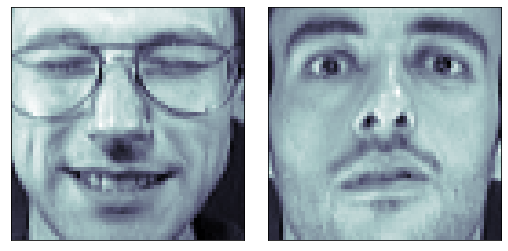

In [95]:
mistakes_show(svc_beard2,X_train, X_test, y_train, y_test)

## 核函数改用 多项式核函数

In [143]:
svc_beard3 = SVC(C=100.0, kernel='poly',degree=2,gamma='auto',tol=0.0001)
train_and_evaluate(svc_beard3, X_train, X_test, y_train, y_test)

训练集精度:
0.9833333333333333

测试集精度:
0.97

分类识别报告:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        78
         1.0       1.00      0.86      0.93        22

    accuracy                           0.97       100
   macro avg       0.98      0.93      0.95       100
weighted avg       0.97      0.97      0.97       100


混淆矩阵:
[[78  0]
 [ 3 19]]


[34, 48, 50]


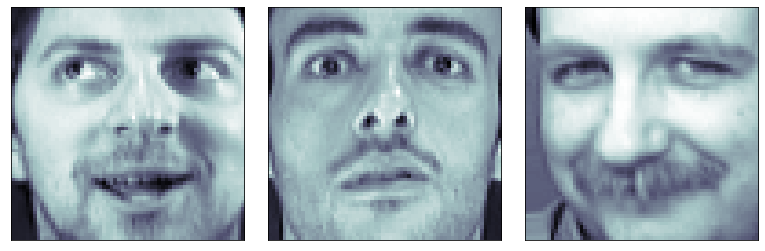

In [104]:
mistakes_show(svc_beard3,X_train, X_test, y_train, y_test)

## 调参

### gamma

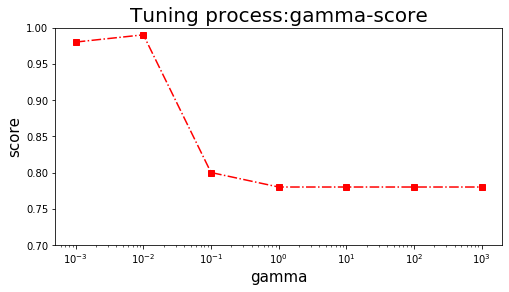

In [156]:
gamma_list=[0.001,0.01,0.1,1,10,100,1000]
score_list=[]
for i in range(len(gamma_list)):
    svc_beard_test = SVC(C=100.0, kernel='rbf',gamma=gamma_list[i],tol=0.0001,)
    svc_beard_test.fit(X_train, y_train)             # 训练
    score=svc_beard_test.score(X_test, y_test)
    score_list.append(score)
fig = plt.figure(figsize=(8, 4)) 
ax = fig.add_subplot(1, 1, 1);ax.set_xscale('log')
plt.plot(gamma_list,score_list,'rs-.')
plt.xlabel("gamma",fontsize=15)#x轴标签
plt.ylabel("score",fontsize=15)#y轴标签
plt.title("Tuning process:gamma-score",fontsize=20)
plt.ylim(0.7, 1)
plt.show()

## degree

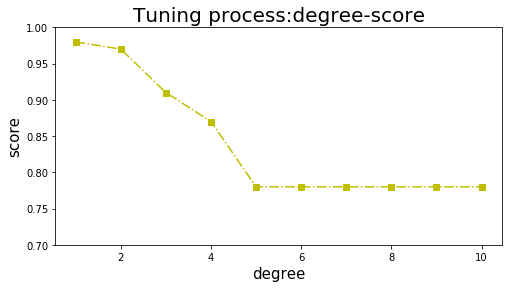

In [157]:
degree_list=np.linspace(1,10,10)
score_list=[]
for i in range(len(degree_list)):
    svc_beard_test = SVC(C=100.0, kernel='poly',degree=degree_list[i],gamma='auto',tol=0.0001)
    svc_beard_test.fit(X_train, y_train)             # 训练
    score=svc_beard_test.score(X_test, y_test)
    score_list.append(score)
fig = plt.figure(figsize=(8, 4)) 
ax = fig.add_subplot(1, 1, 1)
plt.plot(degree_list,score_list,'ys-.')
plt.xlabel("degree",fontsize=15)#x轴标签
plt.ylabel("score",fontsize=15)#y轴标签
plt.title("Tuning process:degree-score",fontsize=20)
plt.ylim(0.7, 1)
plt.show()

## 总结
* 本题中核函数采用线性核函数 比 采用径像核函数以及多项式核函数 更具有优势，后两者需要将错误项惩罚系数 以及 svm停止训练的误差精度 提高至一定的值才能达到与前者相近的效果
* 不同核函数判断错误的集合中有共同的照片，说明这些照片本身就具有一定的迷惑性，即使是人工判断也难以区分是“阴影”还是“胡子”
* 对不同核函数内的参数进行调整，比如径像核函数中的gamma值，多项式核函数中的阶数，可以找到较优的分类函数